<a href="https://colab.research.google.com/github/khiljaekang/colab/blob/main/CIFAR10_%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4
#훈련용 데이터
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
# 테스트용 데이터
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
##훈련용// 테스트용을 따로 만드는 것이 과적합을 피하기 위한 방법 (overfit)


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


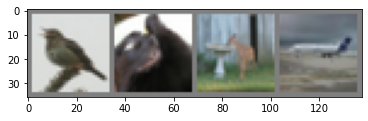

 bird   cat  deer plane


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [6]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [8]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data      #그림 4개 , 라벨링한 거 4개 

        # zero the parameter gradients
        optimizer.zero_grad() #가중치를 초기화 시킴

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.218
[1,  4000] loss: 1.872
[1,  6000] loss: 1.680
[1,  8000] loss: 1.561
[1, 10000] loss: 1.492
[1, 12000] loss: 1.439
[2,  2000] loss: 1.372
[2,  4000] loss: 1.336
[2,  6000] loss: 1.330
[2,  8000] loss: 1.271
[2, 10000] loss: 1.252
[2, 12000] loss: 1.259
[3,  2000] loss: 1.167
[3,  4000] loss: 1.196
[3,  6000] loss: 1.168
[3,  8000] loss: 1.191
[3, 10000] loss: 1.148
[3, 12000] loss: 1.170
[4,  2000] loss: 1.090
[4,  4000] loss: 1.070
[4,  6000] loss: 1.097
[4,  8000] loss: 1.090
[4, 10000] loss: 1.073
[4, 12000] loss: 1.083
[5,  2000] loss: 1.002
[5,  4000] loss: 0.999
[5,  6000] loss: 1.006
[5,  8000] loss: 1.023
[5, 10000] loss: 1.046
[5, 12000] loss: 1.016
[6,  2000] loss: 0.924
[6,  4000] loss: 0.949
[6,  6000] loss: 0.965
[6,  8000] loss: 0.969
[6, 10000] loss: 0.973
[6, 12000] loss: 0.967
[7,  2000] loss: 0.875
[7,  4000] loss: 0.907
[7,  6000] loss: 0.906
[7,  8000] loss: 0.922
[7, 10000] loss: 0.932
[7, 12000] loss: 0.949
[8,  2000] loss: 0.863
[8,  4000] 

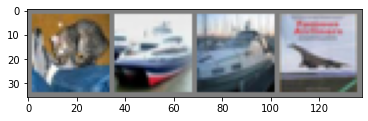

GroundTruth:    cat  ship  ship plane


In [9]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [10]:
outputs = net(images)
outputs

tensor([[-0.6768, -1.8952, -0.1756,  2.9309,  1.0996,  2.6373, -0.3658, -2.2228,
          1.9547, -1.4906],
        [ 6.5182,  2.8882, -0.8169, -4.5769, -1.3021, -5.4144, -6.5225, -4.3440,
          8.4402,  4.9702],
        [ 4.3190,  3.4591, -1.1800, -3.0089, -2.0825, -3.6464, -3.0667, -3.7440,
          5.4425,  3.6967],
        [ 4.6066, -2.2340,  1.6165, -0.4253, -0.3359, -1.1768, -0.6750, -1.0864,
          1.1436, -0.1936]], grad_fn=<AddmmBackward>)

In [12]:
torch.max(outputs, 1 )

torch.return_types.max(values=tensor([2.9309, 8.4402, 5.4425, 4.6066], grad_fn=<MaxBackward0>), indices=tensor([3, 8, 8, 0]))

In [13]:
classes[3]

'cat'

In [14]:
classes[8]

'ship'

In [15]:
classes[0]

'plane'

In [16]:
correct = 0 #맞은 개수 
total = 0 #총 개수 
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():       #gradient적용 안하겠다. 
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 63 %


In [17]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class plane is: 71.8 %
Accuracy for class car   is: 76.5 %
Accuracy for class bird  is: 50.3 %
Accuracy for class cat   is: 45.7 %
Accuracy for class deer  is: 48.8 %
Accuracy for class dog   is: 47.9 %
Accuracy for class frog  is: 70.0 %
Accuracy for class horse is: 69.6 %
Accuracy for class ship  is: 73.7 %
Accuracy for class truck is: 79.6 %
